#### Image Classification

+   Build an Artificial Neural Network that recognizes objects
+   Capture images from webcam and create datasets
+   Here there are three classes and each with 100 images


+   This project is done with tensorflow, keras and following architecture are applied
       + LeNet-5
       + MobileNet
       + ResNet-50

In [1]:
# Load dependencies
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow.keras as tk
from tensorflow.keras.models import Sequential, Model, load_model
#from tensorflow.keras.layers import Conv2D, Dense, InputLayer, Dropout,MaxPooling2D, Flatten, BatchNormalization

from tensorflow import keras
from keras.applications.mobilenet import MobileNet, decode_predictions, preprocess_input
from keras import preprocessing
#from tensorflow.keras.preprocessing import image
import keras.backend as K
from keras.layers import Dense,Flatten,GlobalAveragePooling2D,InputLayer,Dropout, Conv2D, MaxPooling2D

from keras.preprocessing import image
from tensorflow.keras.preprocessing import image
import glob

# import tensorflow as tflow
# from tensorflow.keras.layers import Flatten
# from keras.layers.core import Dense
# from tensorflow.keras.optimizers import Adam



2023-04-21 19:16:57.408526: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-21 19:16:57.872079: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-21 19:16:57.872152: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-21 19:16:59.683472: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

#### Data & preprocessing

In [2]:
# Preprocessing function that is applied to images

data_gen = preprocessing.image.ImageDataGenerator(   # loads data in batches from disk
    preprocessing_function=preprocess_input,
    # fill_mode='nearest',                           # fill points outside boundary with nearest pixel
    rotation_range=20,                               # rotate image by a random degree between -20 and 20
    # width_shift_range=0.2,                         # shift image horizontally 
    # height_shift_range=0.2,                        # shift image vertically 
    # horizontal_flip=True,                          # randomly flip image horizontally
    zoom_range=0.5,                                  # apply zoom transformation using zoom factor between 0.5 and 1.5
    # shear_range=0.2                                # shear rotates pics, but makes them be in trapezoids (as opposed to squares)
    validation_split=0.2                             # split data
)

In [3]:
# Load data 
# A generator that returns batches of X and y arrays
# Training data

train_data_gen = data_gen.flow_from_directory(              # points to dir where data is
        directory='/images/',
        class_mode="categorical",                           # problem is catagorical
        classes=['bottle', 'flask', 'lunchbox'],
        batch_size=60,
        target_size=(224, 224),
    subset='training'
)

Found 240 images belonging to 3 classes.


In [4]:
# Validation/test data

val_data_gen = data_gen.flow_from_directory(
        directory='/images/',
        class_mode="categorical",
        classes=['bottle', 'flask', 'lunchbox'],
        batch_size=20,
        target_size=(224, 224),
    subset='validation'
)

Found 60 images belonging to 3 classes.


In [5]:
# Print the 'new' classes

print(train_data_gen.class_indices)
classes = ['bottle/*', 'flask/*', 'lunchbox/*']
print(classes)

{'bottle': 0, 'flask': 1, 'lunchbox': 2}
['bottle/*', 'flask/*', 'lunchbox/*']


Image type :  <class 'PIL.PngImagePlugin.PngImageFile'>
Image size :  (224, 224)
Image shape :  (1, 224, 224, 3)


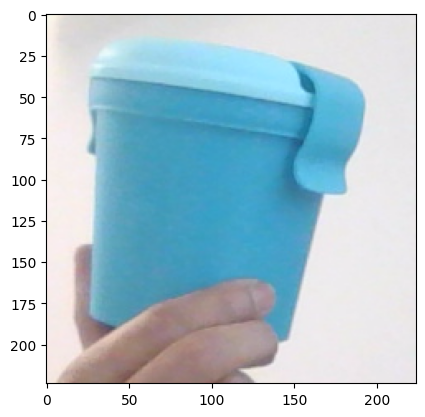

In [6]:
# Load a Random unseen image to check it  

img = image.load_img('lunchboxTest1.png',target_size=(224,224))     # Load image
plt.imshow(img)                                                     # See the image
print('Image type : ',type(img))
print('Image size : ',img.size)

x = np.array(img)
X = np.array([x]) 
print('Image shape : ', X.shape)

#### Implement 'LeNet-5' CNN (Convulational Neural Network) architecture
        +   LeNet-5 is a small network, that contains the basic modules of deep learning.
        +   LeNet-5 is made up of 7 layers (3 convolutional layers, 2 subsampling layers and 2 fully connected layers).


In [7]:
# LeNet-5 architecture

K.clear_session()                       # clearing session to avoid interference

model_LeNet5 = Sequential([Conv2D(filters = 6 , kernel_size = (5,5), strides = (1,1), padding = "valid", 
           activation = tk.activations.relu , input_shape = (224,224,3),            # use relu
           kernel_initializer=tk.initializers.GlorotNormal(seed=34)),
           MaxPooling2D(pool_size = (2,2), strides=(2,2), padding = "valid"), 
           Flatten(), 
           Dense(units=24, activation=tk.activations.relu),             # 1st dense layer with 'relu'
           Dense(units=3, activation=tk.activations.softmax)            # Output layer with softmax, since its a classification problem
           ])

2023-04-21 19:17:55.952530: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-04-21 19:17:55.953398: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-21 19:17:55.953480: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Tuna-lap): /proc/driver/nvidia/version does not exist
2023-04-21 19:17:55.955586: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
# Check the model summary:

model_LeNet5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 6)       456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 6)      0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 72600)             0         
                                                                 
 dense (Dense)               (None, 24)                1742424   
                                                                 
 dense_1 (Dense)             (None, 3)                 75        
                                                                 
Total params: 1,742,955
Trainable params: 1,742,955
Non-trainable params: 0
______________________________________________

In [9]:
# Compile the model

model_LeNet5.compile(optimizer=tk.optimizers.Adam(), # Adam
              loss=tk.losses.categorical_crossentropy , # multiclass: 'categorical_crossentropy' 
              metrics=['accuracy'])

In [10]:
# Observe the validation loss and stop when it does not improve (less than 0.05) after 3 iterations

callback = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.05,     # the minimum expected change in the metric to be seen as an improvement
    patience=3,         # number of epochs with no improvement needed for the model to stop
    restore_best_weights=True,
    mode='min'
    )

In [11]:
# Model fit

history_LeNet5 = model_LeNet5.fit(train_data_gen,
          verbose=2, 
          callbacks=[callback],
          epochs=10,
          validation_data=val_data_gen
          )

Epoch 1/10
4/4 - 8s - loss: 0.9492 - accuracy: 0.7292 - val_loss: 0.0078 - val_accuracy: 1.0000 - 8s/epoch - 2s/step
Epoch 2/10
4/4 - 5s - loss: 0.1672 - accuracy: 0.9750 - val_loss: 0.1552 - val_accuracy: 0.9667 - 5s/epoch - 1s/step
Epoch 3/10
4/4 - 5s - loss: 0.1847 - accuracy: 0.9667 - val_loss: 0.0587 - val_accuracy: 0.9833 - 5s/epoch - 1s/step
Epoch 4/10
4/4 - 5s - loss: 0.0254 - accuracy: 0.9958 - val_loss: 0.0132 - val_accuracy: 1.0000 - 5s/epoch - 1s/step


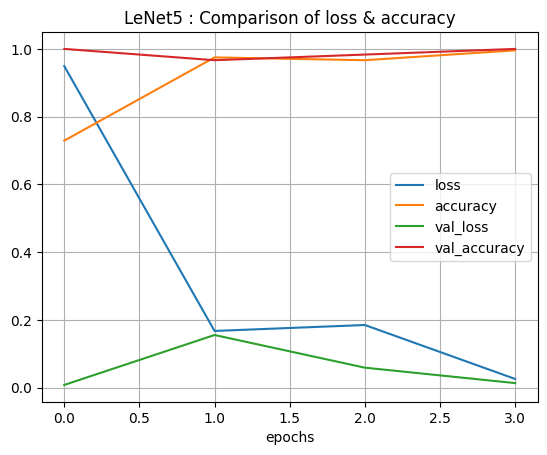

In [14]:
# Plot loss versus accuracy curves

pd.DataFrame(data=history_LeNet5.history).plot()
plt.grid(True)
plt.xlabel('epochs')
plt.title('LeNet5 : Comparison of loss & accuracy')
plt.show()

1/1 [==============================] - 0s 181ms/step
[[1.0144119e-07 3.3485315e-09 9.9999988e-01]]


<BarContainer object of 3 artists>

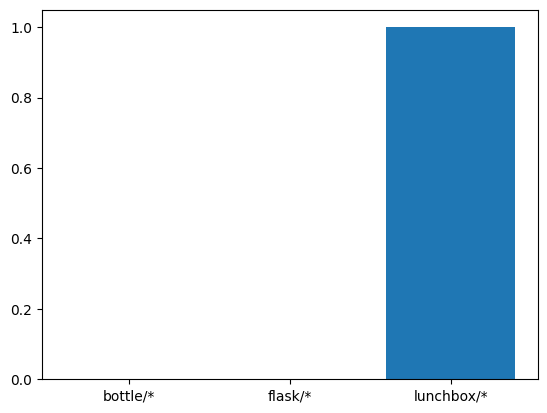

In [13]:
# Predict unseen image that is loaded before

X_preprocess = preprocess_input(X)

pred_LeNet5 = model_LeNet5.predict(X_preprocess)
print(pred_LeNet5)

plt.bar(x = classes, height = pred_LeNet5[0])

#### Apply 'Mobilenet' 
        + Check the unseen image with MobileNet

In [15]:
# Load pretrained model 'MobileNet'

model_MobileNet = MobileNet()

# And Check the model summary

model_MobileNet.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [16]:
# Prediction :  The Random unseen image  

pred_MobileNet = model_MobileNet.predict(X)
pred_MobileNet.shape

1/1 [==============================] - 1s 1s/step


(1, 1000)

In [17]:
# Print and decode the predictions 

print(pred_MobileNet[0,:10]) # MobileNet predicts whether an image belongs to one of 1k classes (i.e. prob of belonging to one of these classes)
decode_predictions(pred_MobileNet)      # prediction in "human-readable" format

[8.0918653e-06 3.1318769e-03 3.6047184e-04 3.4928416e-05 4.7621163e-04
 2.2720682e-04 1.2083677e-04 1.4315044e-05 6.3419202e-07 1.1356826e-05]


[[('n04209239', 'shower_curtain', 0.09607221),
  ('n02606052', 'rock_beauty', 0.09566235),
  ('n01917289', 'brain_coral', 0.07959769),
  ('n04152593', 'screen', 0.071427085),
  ('n03888257', 'parachute', 0.06350003)]]

The result shows that it predicts different other things then the known 'lunchbox' 

#### Apply 'Mobilenet'
        + Use MobileNet as CNN (convolutional neural network) base model
        + Include dense layers, activation function and other hyperparameters
        + Compile the model and fit with training data
        + Finally predict few new images
        + Save model for future use

In [18]:
# Select the convolutional base 
# I use MobileNet pretrained network for transfer learning (pre-trained machine learning model repurposed for another related task for faster development)
# MobileNet: TensorFlow’s first mobile computer vision model.

K.clear_session()
base_model = MobileNet(                         # base model is MobileNet
    weights='imagenet',
    include_top=False,                          # keep convolutional layers only & 'True' means keep both
    input_shape=(224, 224, 3)
)

In [19]:
# Check summary of Mobilenet

base_model.summary()

# Freeze the weights
base_model.trainable = False  # I don't want to train the base model, since this would destroy filters


Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [20]:
# Building "individualized" architecture for "top-layers"
# Adding dense layers on top

model_preMobileNet = keras.Sequential()
model_preMobileNet.add(base_model)
model_preMobileNet.add(Flatten())
model_preMobileNet.add(Dense(100, activation='relu'))                   # Inner dense layer with ReLU activation
model_preMobileNet.add(Dropout(0.3))                                    # To avoid overfitting : drop 30% of nodes during back propogation
model_preMobileNet.add(Dense(len(classes), activation='softmax'))       # Adding three new classes & using softmax for classification problem

In [21]:
# Check summary of the new model

model_preMobileNet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 100)               5017700   
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 303       
                                                                 
Total params: 8,246,867
Trainable params: 5,018,003
Non-trainable params: 3,228,864
______________________________________

In [22]:
# Compile and Train

model_preMobileNet.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss=keras.losses.categorical_crossentropy,       # Loss function for categorical problems
              metrics=[keras.metrics.categorical_accuracy])

# observe the validation loss and stop when it does not improve after 3 iterations

callback = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.05,     # the minimum expected change in the metric used in order to be seen as an improvement
    patience=3,         # number of epochs with no improvement needed for the model to stop
    restore_best_weights=True,
    mode='min'
    )

In [23]:
# Model fitting

history_preMobileNet = model_preMobileNet.fit(train_data_gen,
          verbose=2, 
          callbacks=[callback],
          epochs=10,                        # number of epochs(guessed)
          validation_data=val_data_gen
          )

Epoch 1/10
4/4 - 12s - loss: 7.4460 - categorical_accuracy: 0.6042 - val_loss: 4.0067 - val_categorical_accuracy: 0.7667 - 12s/epoch - 3s/step
Epoch 2/10
4/4 - 7s - loss: 1.4247 - categorical_accuracy: 0.9000 - val_loss: 7.5224e-06 - val_categorical_accuracy: 1.0000 - 7s/epoch - 2s/step
Epoch 3/10
4/4 - 7s - loss: 0.0307 - categorical_accuracy: 0.9958 - val_loss: 1.5895e-08 - val_categorical_accuracy: 1.0000 - 7s/epoch - 2s/step
Epoch 4/10
4/4 - 7s - loss: 0.4850 - categorical_accuracy: 0.9875 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000 - 7s/epoch - 2s/step
Epoch 5/10
4/4 - 7s - loss: 2.4835e-09 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000 - 7s/epoch - 2s/step


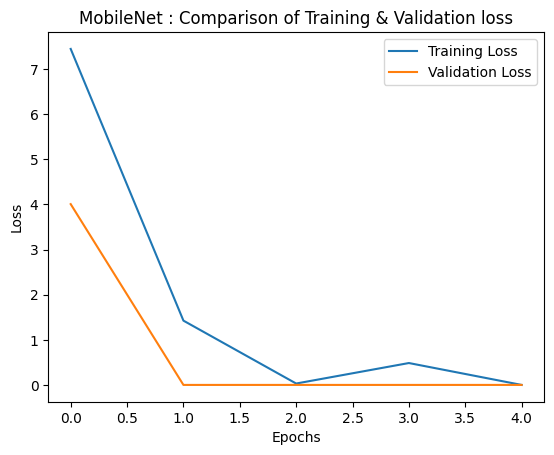

In [24]:
# Plot the Training loss versus Validation loss

plt.plot(history_preMobileNet.history['loss'], label = 'Training Loss')
plt.plot(history_preMobileNet.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('MobileNet : Comparison of Training & Validation loss')
plt.legend()
plt.show()

In [25]:
# Define function to predict few images at one go

test_path = '/images/testImage/*'    # path to the test images

def batch_prediction(path=test_path):
    for i,img_path in enumerate(glob.glob(test_path)):

        img = image.load_img(img_path,target_size=(224,224))
        actual_label = img_path[65:-7]

        x = np.array(img)
        X = np.array([x]) 
        X_preprocess = preprocess_input(X)

        pred_preMobileNet = model_preMobileNet.predict(X_preprocess)

        # Plotting
        plt.subplot(3,2, i+1)
        plt.tight_layout()
        plt.imshow(img)
        plt.title(f"""actual label is {actual_label} \n predicted as {classes[pred_preMobileNet.argmax()]}""" )

1/1 [==============================] - 0s 71ms/step


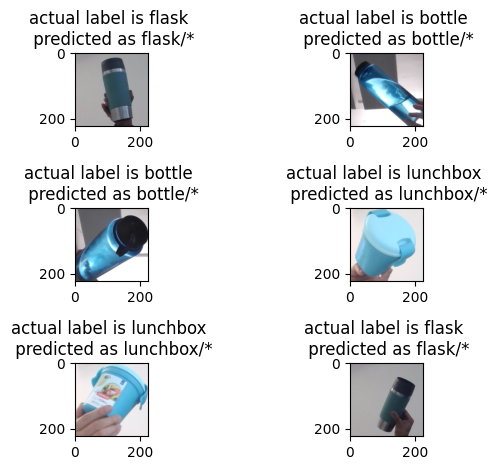

In [26]:
# Call the function and Plot the results

batch_prediction()

As we can see above that the model predicts the images correctly.
To bring in more robustness to the prediction one can add more images with different colors,
images with different lightening conditions, etc. 

In [ ]:
# Save your model for later

# model_preMobileNet.save('classfication.h5')

# Load the saved model
# network = load_model("classfication.h5")
# network.summary()

#### Apply 'ResNet50'
        + Use ResNet50 as base model
        + Repeat the same as done with MobileNet and finally save the model

In [27]:
# ResNet50: It is a 50-layer cnn (48 convolutional layers, one MaxPool layer, and one average pool layer). 

preResNet50= tk.applications.ResNet50(include_top=False, input_shape=(224,224,3),
                                                              pooling='avg',classes=3,weights='imagenet')
                        #  weights parameter: model uses its weights while training on the imagenet dataset.
for each_layer in preResNet50.layers:   # ensures it doesn’t learn its weights again
        each_layer.trainable=False


In [28]:
# Building "individualized" architecture for "top-layers"
# Adding dense layers on top (fully connected output layer to the model)

model_preResNet50 = Sequential()
model_preResNet50.add(preResNet50)
model_preResNet50.add(Flatten())
model_preResNet50.add(Dense(100, activation='relu'))
model_preResNet50.add(Dense(3, activation='softmax'))

In [31]:
# Compile and fit : use same hyperparameter values as of MobileNet

model_preResNet50.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                          loss='categorical_crossentropy',metrics=['accuracy'])

history_preResNet50 = model_preResNet50.fit(train_data_gen, callbacks=[callback], validation_data=val_data_gen, epochs=15)


Epoch 1/15
4/4 [==============================] - 24s 5s/step - loss: 0.5953 - accuracy: 0.6875 - val_loss: 0.5379 - val_accuracy: 0.7500
Epoch 2/15
4/4 [==============================] - 16s 4s/step - loss: 0.5129 - accuracy: 0.7667 - val_loss: 0.4711 - val_accuracy: 0.8167
Epoch 3/15
4/4 [==============================] - 16s 4s/step - loss: 0.5177 - accuracy: 0.7542 - val_loss: 0.4895 - val_accuracy: 0.7167
Epoch 4/15
4/4 [==============================] - 16s 4s/step - loss: 0.4716 - accuracy: 0.7833 - val_loss: 0.4185 - val_accuracy: 0.8333
Epoch 5/15
4/4 [==============================] - 17s 4s/step - loss: 0.4706 - accuracy: 0.8083 - val_loss: 0.3920 - val_accuracy: 0.8667
Epoch 6/15
4/4 [==============================] - 17s 4s/step - loss: 0.4005 - accuracy: 0.8542 - val_loss: 0.3833 - val_accuracy: 0.8833
Epoch 7/15
4/4 [==============================] - 17s 4s/step - loss: 0.3968 - accuracy: 0.8458 - val_loss: 0.3681 - val_accuracy: 0.8833
Epoch 8/15
4/4 [==================

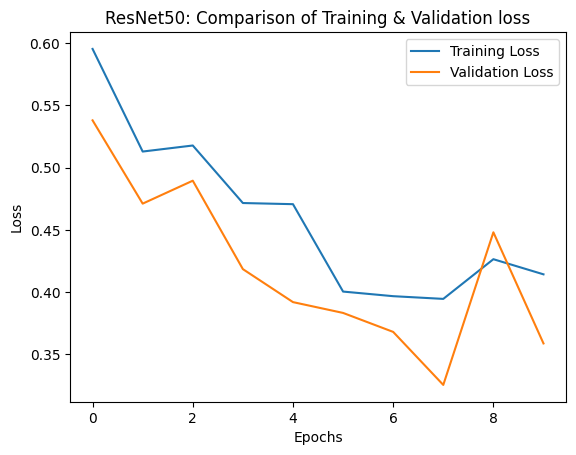

In [32]:
# Plot the Training loss versus Validation loss

plt.plot(history_preResNet50.history['loss'], label = 'Training Loss')
plt.plot(history_preResNet50.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('ResNet50: Comparison of Training & Validation loss')
plt.legend()
plt.show()

In [33]:
def batch_predictionResnet(path=test_path):
    for i,img_path in enumerate(glob.glob(test_path)):

        img = image.load_img(img_path,target_size=(224,224))
        actual_label = img_path[65:-7]

        x = np.array(img)
        X = np.array([x]) 
        X_preprocess = preprocess_input(X)

        pred_preResNet50 = model_preResNet50.predict(X_preprocess)

        # Plotting
        plt.subplot(3,2, i+1)
        plt.tight_layout()
        plt.imshow(img)
        plt.title(f"""actual label is {actual_label} \n predicted as {classes[pred_preResNet50.argmax()]}""" )

1/1 [==============================] - 0s 133ms/step


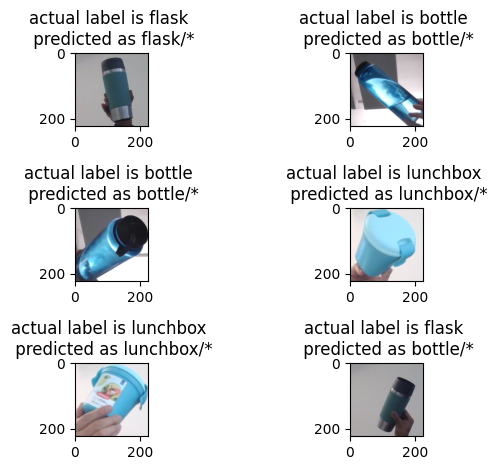

In [34]:
batch_predictionResnet()

Here the model predicts the images correctly except one. Adding more images with different colors, 
and background lightening conditions could improve the model result.